**PyAthena**

**AWS Wrangler**

In [2]:
import boto3
import awswrangler as wr

def athena_auth():
    boto3.setup_default_session(
        aws_access_key_id=aws_access_key_id,
        aws_secret_access_key=aws_secret_access_key,
        region_name=region_name
    )

    return {
        "database": "s3_atmos_stclair",
        "workgroup": "primary",
        "s3_output": "s3://halight-athena-query-results/stclair/"
    }

ATHENA_CFG = athena_auth()


In [3]:
tables = wr.catalog.tables(database="s3_atmos_stclair")
print(tables)


            Database                             Table Description  \
0   s3_atmos_stclair      achievement_user_completions               
1   s3_atmos_stclair                      achievements               
2   s3_atmos_stclair                     banner_clicks               
3   s3_atmos_stclair              bdg_user_completions               
4   s3_atmos_stclair               certification_users               
5   s3_atmos_stclair                     comment_likes               
6   s3_atmos_stclair                community_comments               
7   s3_atmos_stclair                    country_states               
8   s3_atmos_stclair                         instances               
9   s3_atmos_stclair                       instances_v               
10  s3_atmos_stclair                       li_attempts               
11  s3_atmos_stclair                  li_stats_agg_all               
12  s3_atmos_stclair                li_stats_agg_all_v               
13  s3_atmos_stclair

**Problem Statement**


“We are predicting whether a user will make a claim within 7 days of using a product/training portal.”

This is a classification problem (Yes/No).

Later, we could even turn it into regression if we want to predict the exact number of days until a claim

In [4]:
df = wr.athena.read_sql_query(
    sql="SELECT * FROM  reward_user_claims_v",
    **ATHENA_CFG,
    ctas_approach=False
)


In [5]:
df.head()

,instance_id,client_name,region_name,site_name,product_name,instance_launch_date,generated_ts,claim_id,claimed_ts,last_updated_ts,...,user_location_city,user_location_zipcode,user_location_address_line1,user_location_address_line2,user_location_metadata_json,user_country_code,user_country_name,user_rank_number,user_rank_title,user_last_li_completion_ts
0,EA53680F4661F0DE3467171D00E5B6C8,Electrolux,<NA>,Lära,Atmosphere,2024-01-30,2025-09-05 05:00:23,102,2025-09-04 12:59:00,NaT,...,<NA>,<NA>,<NA>,<NA>,<NA>,TW,Taiwan,1,Rank 1,2025-08-15 03:40:45
1,EA53680F4661F0DE3467171D00E5B6C8,Electrolux,<NA>,Lära,Atmosphere,2024-01-30,2025-07-25 04:01:23,1,2025-07-24 12:59:00,NaT,...,<NA>,<NA>,<NA>,<NA>,<NA>,MY,Malaysia,1,Rank 1,2025-07-18 07:46:53
2,A17B5D1C84AC7093025B72EB2653DA56,Lenovo,<NA>,Lenovo Training Portal,Atmosphere,2024-01-30,2026-01-29 05:00:24,1302,2026-01-28 19:59:55,NaT,...,<NA>,<NA>,"Vestergårdsvej 58, 4700 Næstved",<NA>,<NA>,DK,Denmark,<NA>,<NA>,2026-01-31 20:07:46
3,A17B5D1C84AC7093025B72EB2653DA56,Lenovo,<NA>,Lenovo Training Portal,Atmosphere,2024-01-30,2025-11-01 05:00:29,2,2025-10-31 06:06:21,NaT,...,<NA>,<NA>,<NA>,<NA>,<NA>,IT,Italy,<NA>,<NA>,2026-01-19 06:07:57
4,A17B5D1C84AC7093025B72EB2653DA56,Lenovo,<NA>,Lenovo Training Portal,Atmosphere,2024-01-30,2026-01-22 05:00:26,602,2026-01-21 12:27:24,NaT,...,<NA>,<NA>,<NA>,<NA>,<NA>,DK,Denmark,<NA>,<NA>,2026-01-21 12:25:54


In [ ]:


0   
sns.set_style("whitegrid")
pd.set_option("display.max_columns", None)



In [8]:
df.shape
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585200 entries, 0 to 3585199
Data columns (total 59 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   instance_id                  string        
 1   client_name                  string        
 2   region_name                  string        
 3   site_name                    string        
 4   product_name                 string        
 5   instance_launch_date         object        
 6   generated_ts                 datetime64[ns]
 7   claim_id                     string        
 8   claimed_ts                   datetime64[ns]
 9   last_updated_ts              datetime64[ns]
 10  achievement_id               string        
 11  points_earned                Int64         
 12  reward_id                    string        
 13  reward_title                 string        
 14  reward_created_ts            datetime64[ns]
 15  reward_type                  string        
 16  

,instance_id,client_name,region_name,site_name,product_name,instance_launch_date,generated_ts,claim_id,claimed_ts,last_updated_ts,achievement_id,points_earned,reward_id,reward_title,reward_created_ts,reward_type,reward_is_active,reward_quantity_total,prize_id,prize_title,prize_monetary_value,prize_created_ts,prize_point_value,prize_quantity,prize_requires_user_info,prize_part_number,user_id,user_account_created_ts,user_account_confirmed_ts,user_account_merged_ts,user_account_deleted_ts,user_account_status,user_verification_status,is_self_registration,referred_by_user_id,user_first_login_ts,user_last_login_ts,user_last_online_ts,user_type,user_hierarchy_title,user_retailer,user_country_state,user_location_country_code,user_location_state,user_location_id,user_location_title,user_location_code,user_location_longitude,user_location_latitude,user_location_city,user_location_zipcode,user_location_address_line1,user_location_address_line2,user_location_metadata_json,user_country_code,user_country_name,user_rank_number,user_rank_title,user_last_li_completion_ts
count,3585200,3585200,2888256,3585200,3585200,3585200,3585200,3585200,3585200,805294,2524237,1306962.0,3585200,3585200,3585200,3585200,3585200.0,2954170.0,1009267,1009267,1.002834e+06,1009267,1009267.0,1009267.0,1009267.0,185546,3585200,3585196,3583913,4144,907026,3585200,3585200,3585200.0,2375723,3582981,3582981,3403753,3585200,3567003,3548305,3008994,3029731,3008994,3030356,3030356,2210740,306130.000000,306130.000000,3021694,3009436,3026852,117694,2147192,3566703,3584900,1328218.0,1328218,3545652
unique,35,29,5,30,1,17,NaN,2590620,NaN,NaN,7090,<NA>,6739,11895,NaN,8,<NA>,<NA>,7588,3661,NaN,NaN,<NA>,<NA>,<NA>,1742,143655,NaN,NaN,NaN,NaN,4,6,<NA>,19386,NaN,NaN,NaN,112,47,892,214,17,211,41892,37463,23577,NaN,NaN,6400,11061,37765,1840,479,40,41,<NA>,50,NaN
top,7C673923D3074C1589239BD124276E45,Motorola,NA,motorola insiders,Atmosphere,2017-04-16,NaN,1,NaN,NaN,2887,<NA>,81,24 Days of Giving,NaN,Instant Win,<NA>,<NA>,86,500 Points,NaN,NaN,<NA>,<NA>,<NA>,ESG,81793,NaN,NaN,NaN,NaN,Active,Verified,<NA>,25583,NaN,NaN,NaN,Retail Sales Associates,Motorola Insiders,T-Mobile,TX,US,Texas,207137,T-Mobile COR,1,NaN,NaN,Houston,78572,"T-Mobile Professional - Non-Store, Anywhere",SUITE A,"{""chainname"":null}",US,United States,<NA>,hellobeginner,NaN
freq,2609023,2778395,2713451,2778395,3585200,2778395,NaN,33,NaN,NaN,17853,<NA>,110870,123711,NaN,1858840,<NA>,<NA>,36988,559743,NaN,NaN,<NA>,<NA>,<NA>,70648,1730,NaN,NaN,NaN,NaN,2466088,1774919,<NA>,60056,NaN,NaN,NaN,3023754,2757119,885076,396454,2846133,396454,7554,299915,15073,NaN,NaN,55364,9365,7554,2752,859996,3158457,3176541,<NA>,469346,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:54:07.474305536,NaN,2024-01-06 21:25:32.094271744,2024-04-09 01:45:29.414941184,NaN,393.660758,NaN,NaN,2023-11-27 20:35:15.894128384,NaN,0.109148,11150.765801,NaN,NaN,1.116861e+02,2024-02-17 15:55:25.081687296,362.375556,6510.650777,0.230563,NaN,NaN,2022-09-18 15:35:41.039854592,2022-09-25 11:42:42.768068352,2024-11-05 14:09:13.470801152,2024-11-30 07:24:11.843053568,NaN,NaN,0.918527,NaN,2022-10-03 17:53:11.201200384,2025-01-24 18:44:26.551280384,2025-04-25 00:06:50.643007232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-89.524200,38.817486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.579141,NaN,2024-11-27 20:42:20.086093056
min,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-07 14:28:39,NaN,2017-05-10 17:45:46,2022-07-07 10:42:35,NaN,1.0,NaN,NaN,2017-05-09 12:55:15,NaN,0.0,0.0,NaN,NaN,0.000000e+00,2017-06-12 14:53:18,0.0,0.0,0.0,NaN,NaN,2017-04-05 09:32:30,2017-04-05 09:32:30,2022-03-21 11:39:08,2020-11-27 16:23:44,NaN,NaN,0.0,NaN,2017-05-12 10:07:52,2017-05-15 16:50:47,2021-12-09 11:13:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-165.405258,-46.413937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2017-05-15 22:34:50
25%,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-24 04:10:50,NaN,2023-03-22 14:42:22.750000128,2023-06-10 10:16:56.750000128,NaN,100.0,NaN,NaN,2023-02-02 00:15:40,NaN,0.0,400.0,NaN,NaN,0.000000e+00,2023-05-30 23:09:55,50

**Datetime parsing**

In [9]:
date_cols = ["instance_launch_date", "generated_ts", "claimed_ts", "last_updated_ts", "user_last_li_completion_ts"]

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")



**Missing values**

In [10]:
missing = df.isna().mean().sort_values(ascending=False)
missing.head(20)


user_account_merged_ts         0.998844
user_location_address_line2    0.967172
prize_part_number              0.948247
user_location_longitude        0.914613
user_location_latitude         0.914613
last_updated_ts                0.775384
user_account_deleted_ts        0.747008
prize_monetary_value           0.720285
prize_point_value              0.718491
prize_created_ts               0.718491
prize_quantity                 0.718491
prize_requires_user_info       0.718491
prize_id                       0.718491
prize_title                    0.718491
points_earned                  0.635456
user_rank_number               0.629528
user_rank_title                0.629528
user_location_metadata_json    0.401096
user_location_code             0.383371
referred_by_user_id            0.337353
dtype: float64

In [11]:
drop_cols = missing[missing > 0.8].index
df.drop(columns=drop_cols, inplace=True)


In [14]:
# Sort by instance and claimed timestamp
df = df.sort_values(["instance_id", "claimed_ts"])

# Next claim timestamp per instance
df["next_claim_ts"] = df.groupby("instance_id")["claimed_ts"].shift(-1)

# Days to next claim
df["days_to_next_claim"] = (df["next_claim_ts"] - df["claimed_ts"]).dt.days

# Target: claim within 7 days (1 = yes, 0 = no)
df["will_claim_next_7_days"] = (df["days_to_next_claim"].le(7).fillna(0).astype(int))

# Drop rows without claimed_ts
df = df.dropna(subset=["claimed_ts"])




In [15]:
# Drop rows with missing claimed_ts or instance_launch_date

df = df.dropna(subset=["claimed_ts", "instance_launch_date"])




**Feature engineering**


In [16]:
df["days_to_claim"] = (df["claimed_ts"] - df["instance_launch_date"]).dt.days

df["claim_hour"] = df["claimed_ts"].dt.hour

df["claim_day_of_week"] = df["claimed_ts"].dt.dayofweek

df["days_since_last_claim"] = (df["claimed_ts"] - df.groupby("instance_id")["claimed_ts"].shift(1)).dt.days

df["total_claims_so_far"] = df.groupby("instance_id").cumcount()


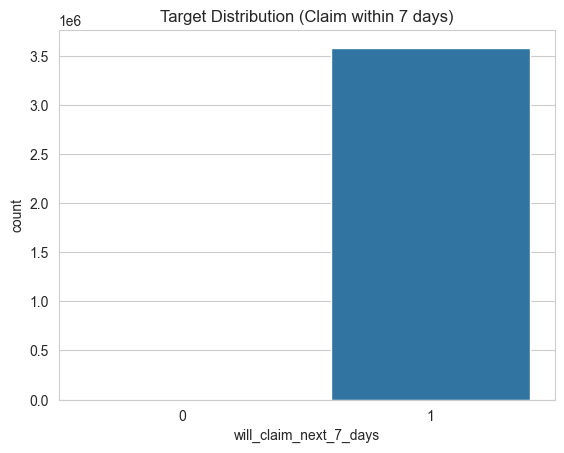

In [17]:
sns.countplot(x="will_claim_next_7_days", data=df)
plt.title("Target Distribution (Claim within 7 days)")
plt.show()


will_claim_next_7_days
1    0.999906
0    0.000094
Name: proportion, dtype: float64


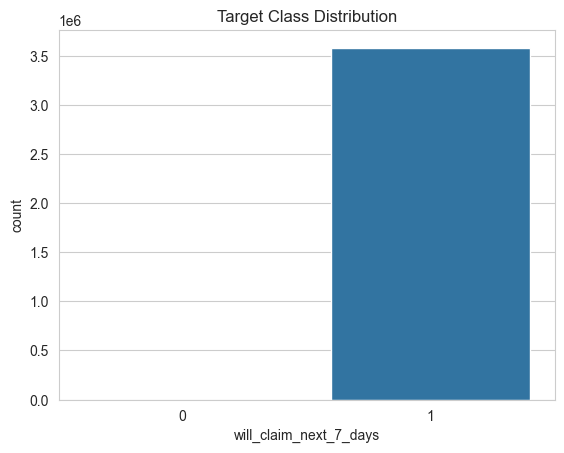

In [18]:
#Check class balance

print(df["will_claim_next_7_days"].value_counts(normalize=True))

sns.countplot(x="will_claim_next_7_days", data=df)
plt.title("Target Class Distribution")
plt.show()


**Numerical EDA**

In [20]:
num_cols = [
    "days_to_claim",
    "days_since_last_claim",
    "total_claims_so_far",
    "claim_hour"
]

df[num_cols].describe()


,days_to_claim,days_since_last_claim,total_claims_so_far,claim_hour
count,3.585200e+06,3.585165e+06,3.585200e+06,3.585200e+06
mean,2.114098e+03,4.408165e-03,9.841785e+05,1.337432e+01
std,8.444681e+02,7.610595e-01,8.311767e+05,4.879888e+00
min,-7.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.506000e+03,0.000000e+00,1.752088e+05,1.100000e+01
50%,2.374000e+03,0.000000e+00,8.164225e+05,1.300000e+01
75%,2.770000e+03,0.000000e+00,1.712722e+06,1.600000e+01
max,3.213000e+03,8.320000e+02,2.609022e+06,2.300000e+01


**Univariate Analysis**

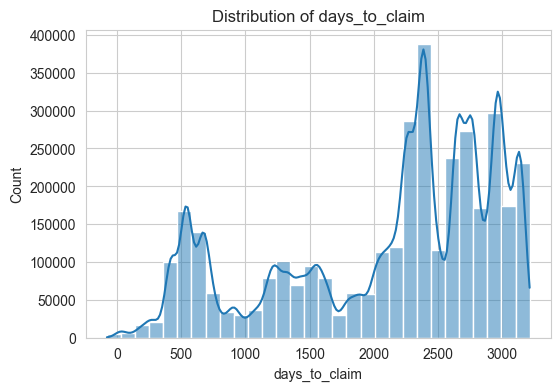

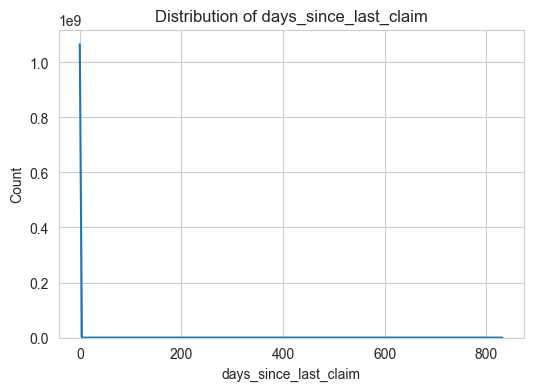

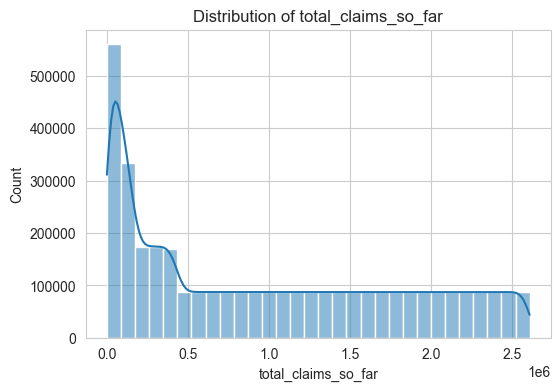

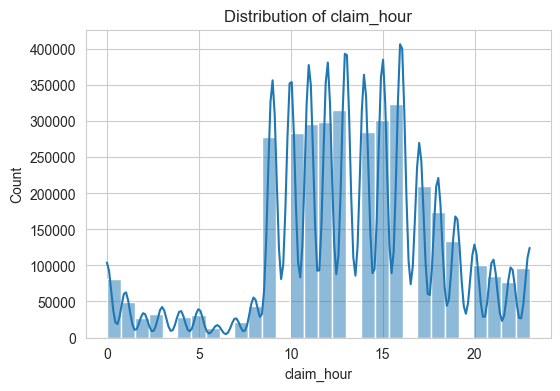

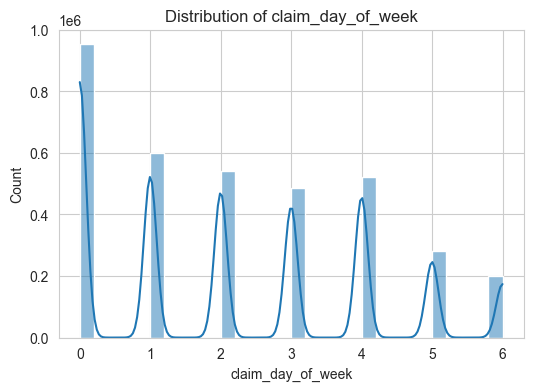

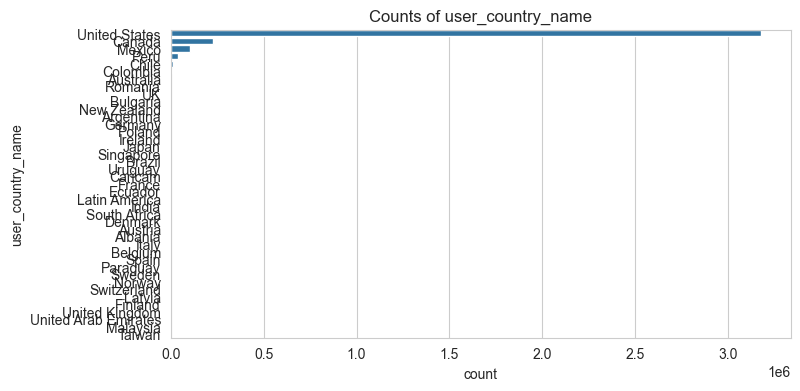

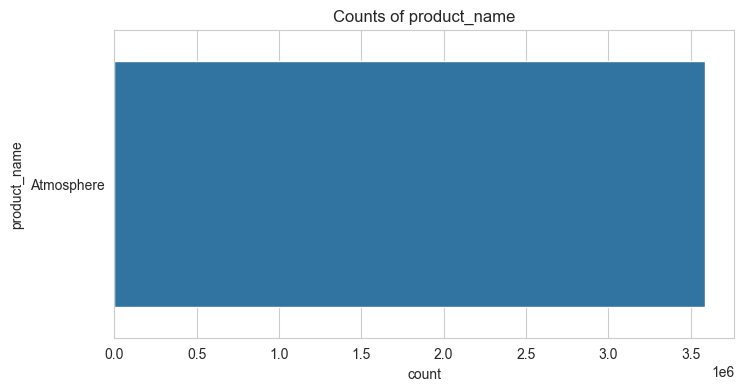

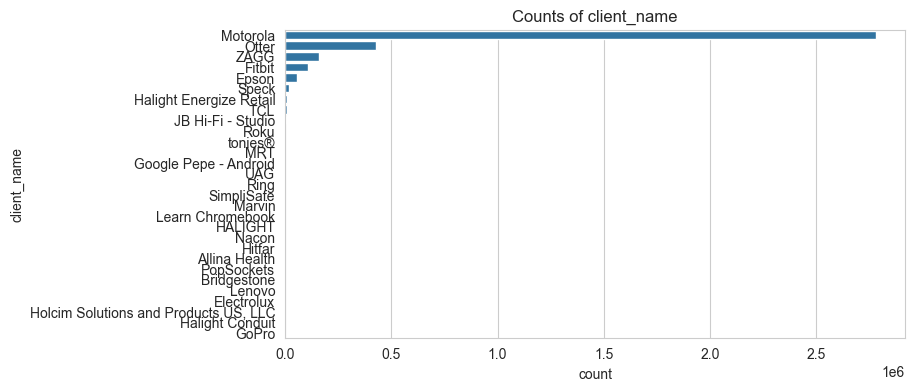

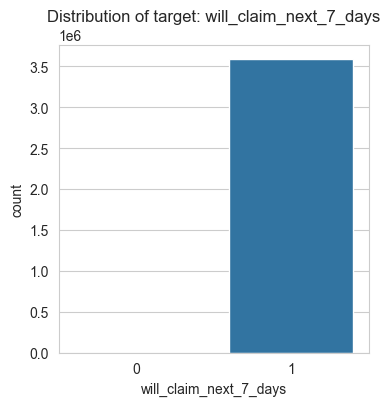

In [23]:
# Numeric features
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(X[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical features
for col in cat_features:
    plt.figure(figsize=(8,4))
    sns.countplot(y=X[col], order=X[col].value_counts().index)
    plt.title(f"Counts of {col}")
    plt.show()

# Target distribution
plt.figure(figsize=(4,4))
sns.countplot(x=y)
plt.title("Distribution of target: will_claim_next_7_days")
plt.show()


**Bivariate Analysis (Feature vs Target**

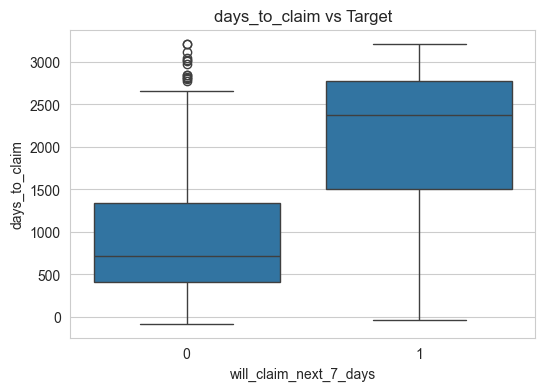

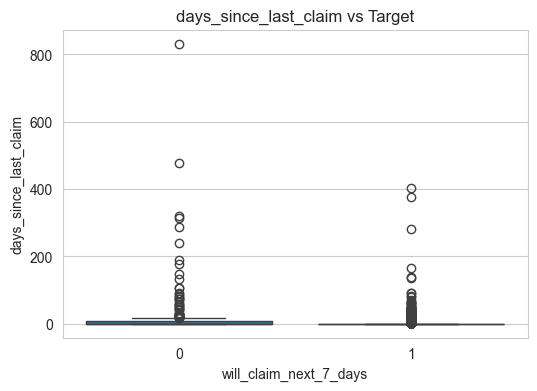

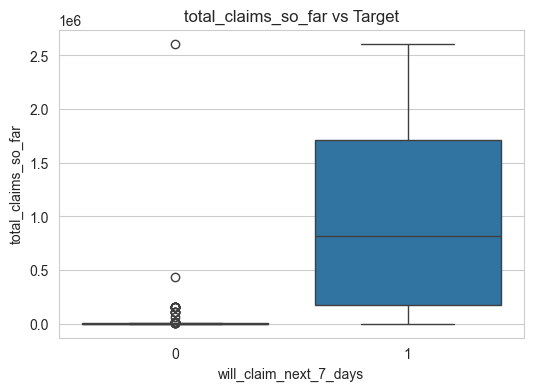

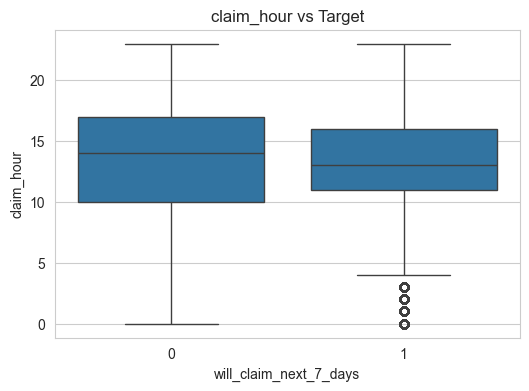

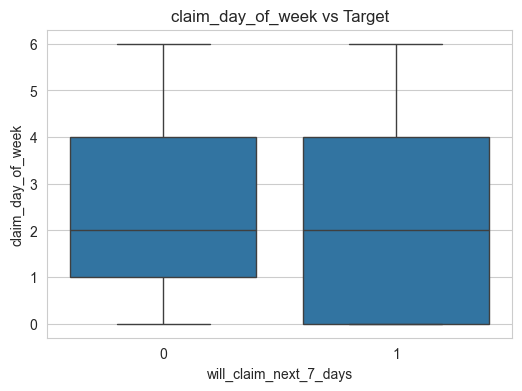

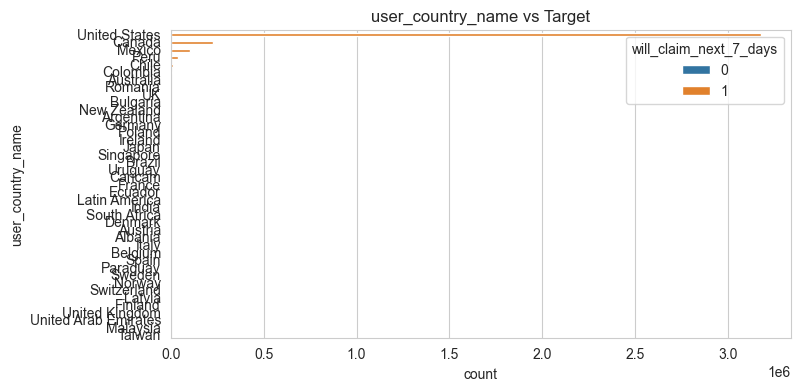

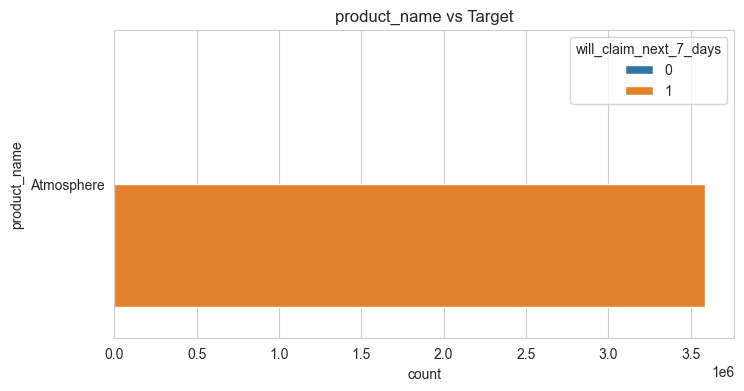

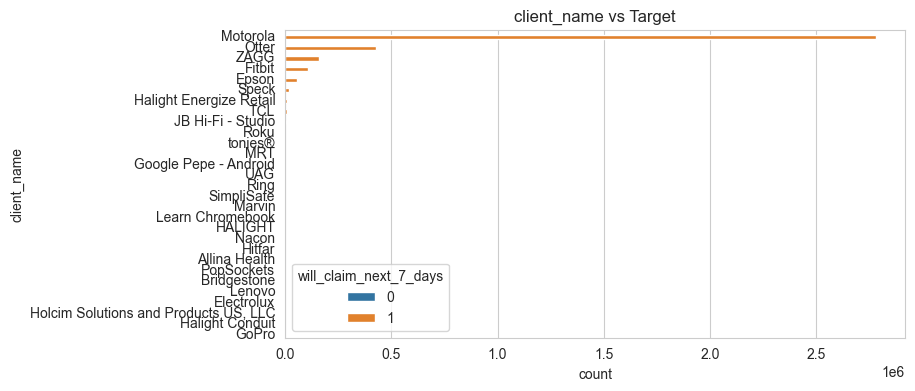

In [24]:
# Numeric vs Target
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y, y=X[col])
    plt.title(f"{col} vs Target")
    plt.show()

# Categorical vs Target
for col in cat_features:
    plt.figure(figsize=(8,4))
    sns.countplot(y=X[col], hue=y, order=X[col].value_counts().index)
    plt.title(f"{col} vs Target")
    plt.show()


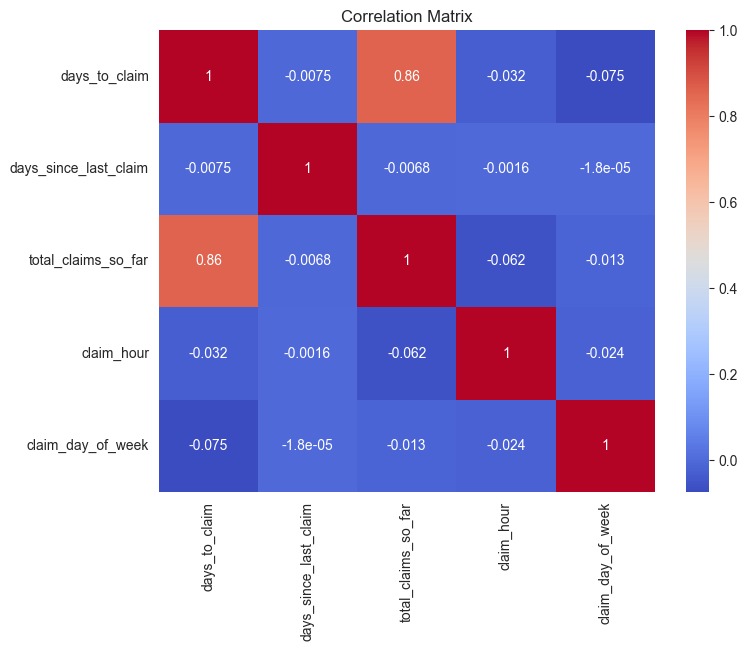

In [25]:
#Correlation heatmap

plt.figure(figsize=(8,6))
sns.heatmap(X[num_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


**Prepare features & target**


In [26]:
target = "will_claim_next_7_days"

num_features = ["days_to_claim", "days_since_last_claim", "total_claims_so_far", "claim_hour", "claim_day_of_week"]
cat_features = ["user_country_name", "product_name", "client_name"]

X = df[num_features + cat_features]
y = df[target]


**Split data**


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


**Fix dtypes**

In [28]:
# Numeric columns → float (pd.NA → np.nan)
for col in num_features:
    X_train[col] = pd.to_numeric(X_train[col], errors="coerce")
    X_test[col] = pd.to_numeric(X_test[col], errors="coerce")

# Categorical columns → string
for col in cat_features:
    X_train[col] = X_train[col].astype("string")
    X_test[col] = X_test[col].astype("string")


In [31]:
# -----------------------------
# 1. Ensure numeric columns are float
# -----------------------------
for col in num_features:
    X_train[col] = pd.to_numeric(X_train[col], errors="coerce")
    X_test[col] = pd.to_numeric(X_test[col], errors="coerce")

# -----------------------------
# 2. Ensure categorical columns are string
# -----------------------------
for col in cat_features:
    X_train[col] = X_train[col].astype(str).fillna("Unknown")
    X_test[col] = X_test[col].astype(str).fillna("Unknown")


**Preprocessing & pipeline**


In [32]:
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
])

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", model)
])


**Train model**

In [33]:
pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


**Evaluate model**


              precision    recall  f1-score   support

           0       0.01      0.90      0.02        67
           1       1.00      0.99      1.00    716973

    accuracy                           0.99    717040
   macro avg       0.51      0.94      0.51    717040
weighted avg       1.00      0.99      1.00    717040

ROC AUC: 0.9967673692660339


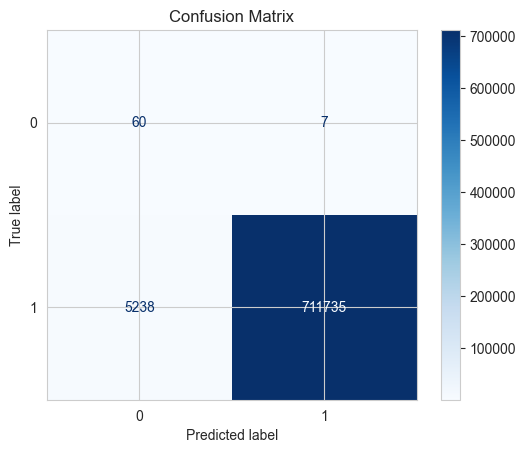

In [38]:
preds = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, preds))
print("ROC AUC:", roc_auc_score(y_test, probs))

# Compute confusion matrix
cm = confusion_matrix(y_test, preds)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipeline.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

